# [YOLO](http://pjreddie.com/darknet/yolo/): Real-Time Object Detection

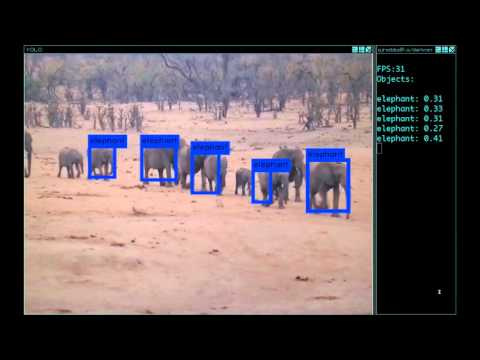

In [6]:
from IPython.display import YouTubeVideo
YouTubeVideo('K9a6mGNmhbc')

YOLO는 Pascal [VOC 2012 dataset](http://host.robots.ox.ac.uk:8080/pascal/VOC/)에 있는 객체를 검출하기 위한 시스템이다. 이 시스템은 20개의 Pascal object classes를 검출할 수 있다.

- person
- bird, cat, cow, dog, horse, sheep
- aeroplane, bicycle, boat, bus, car, motorbike, train
- bottle, chair, dining table, potted plant, sofa, tv/monitor

## 작동 원리
모든 **사전 검출 시스템들**은 검출 성능을 위해 classifier와 localizer를 개조하여 활용한다. 이 시스템들은 하나의 이미지에서 여러 위치와 크기를 가지는 영역들을 모델에 적용하여, 점수가 높게 나온 영역에서 검출한다.

YOLO는 완전히 다른 접근법을 취한다. full image에 하나의 single neural network를 적용하여 이미지를 영역들로 나누고 각 영역에서 bounding boxes(경계박스)와 probabilites를 예측하다. 이러한 경계박스들은 예측된 probabilites에 의해 저울질된다.

![YOLO 모델](http://pjreddie.com/media/image/model_2.png)

마지막으로 검출에 대한 threshold 값을 지정하여, 높은 점수의 검출만을 뽑아낸다.

![screen shot](http://pjreddie.com/media/image/Screen_Shot_2016-09-07_at_10.56.09_PM.png)

YOLO는 다른 classifier기반 시스텝에 비해 여러모로 유리하다. test time에 full 이미지를 보고 이미지에 있는 global contex에 대한 정보를 예측한다. 또한, 하나의 single image에 대한 수천개의 이미지가 필요한 R-CNN-like 시스템과 달리, 하나의 single network을 가지고 예측을 수행하여, R-CNN보다는 1000 배, Fast R-CNN 보다는 100 배 이상 더 빠르다. (상세 내용은 논문 참조)

![comparison](https://ai2-s2-public.s3.amazonaws.com/figures/2016-03-25/21a1654b856cf0c64e60e58258669b374cb05539/6-Table2-1.png)

## 사전 학습된 모델을 사용한 검출
사전 학습된 모델을 사용하여 YOLO 시스템으로 객체 식별하는 방법
1. [Darknet 설치](http://pjreddie.com/darknet/install/)<br>
    - Darknet이 설치되면, cfg/ 서브디렉토리에 YOLO를 위한 config file이 있다.
    - 몇가지 예제 이미지가 data/ 서브디렉토리에 있다.

2. [기 학습된 모델의 weights(W) file](http://pjreddie.com/media/files/yolo.weights)(753MB) 다운로드 또는 아래 script 실행.

    > $> wget http://pjreddie.com/media/files/yolo.weights <br>
    \$> ./darknet yolo test cfg/yolo.cfg yolo.weights data/dog.jpg

3. YOLO example 수행

weights file이 base 폴더에 있다고 가정할 때, data 폴더 내의 eagle.jpg, dog.jpg, person.jpg, horses.jpg 등으로 다음과 같이 YOLO를 실행한다.

> $> ./darknet yolo test cfg/yolo.cfg yolo.weights data/dog.jpg <br>
0: Crop Layer: 448 x 448 -> 448 x 448 x 3 image <br>
1: Convolutional Layer: 448 x 448 x 3 image, 64 filters -> 224 x 224 x 64 image <br>
.... <br>
27: Connected Layer: 4096 inputs, 1225 outputs <br>
28: Detection Layer <br>
Loading weights from yolo.weights...Done! <br>
data/dog.jpg: Predicted in 8.012962 seconds. <br>
0.941620 car <br>
0.397087 bicycle <br>
0.220952 dog <br>
Not compiled with OpenCV, saving to predictions.png instead <br>

Darkent은 검출한 객체, 신뢰도, 검출시간을 출력한다. CPU에서 Darknet을 사용하였기 때문에 이미지당 6~12초가 걸렸는데, GPU를 사용했다면, 훨씬 더 빨랐을 것이다.

OpenCV로 Darknet을 컴파일했다면 직접 그 결과를 확인할 수 있었겠지만, 그렇지 않았기 때문에 아래 그림과 같이 predictions.png 파일에 그 결과를 저장한다.

![predictions.png](http://pjreddie.com/media/image/Screen_Shot_2016-09-07_at_10.56.09_PM.png)

### 다중 이미지 detection
명령어 라인에서 이미지 파일을 직접 입력하는 대신, 여러 이미지를 한번에 테스트하기 위해 아래와 같이 실행한다.

> \$>./darknet yolo test cfg/yolo.cfg yolo.weights <br>
0: Crop Layer: 448 x 448 -> 448 x 448 x 3 image <br>
1: Convolutional Layer: 448 x 448 x 3 image, 64 filters -> 224 x 224 x 64 image <br>
.... <br>
27: Connected Layer: 4096 inputs, 1225 outputs <br>
28: Detection Layer <br>
Loading weights from yolo.weights...Done! <br>
Enter Image Path: **data/eagle.jpg** <br>

입력된 이미지에 대한 영역 boxs들과 영역 내의 객체를 예측한 후에는 또 다른 이미지 입력을 받기 위한 Image Path input 프롬프트가 나타난다. 종료하기 위해서는 [Ctrl][c]를 입력하면 된다.

### Tiny Model
tiny-yolo.cfg는 Darknet [reference network](http://pjreddie.com/darknet/imagenet/#reference)에 기반한다. cfg/ 서브디렉토리에 config file이 있는 상태에서 [기 훈련된 tiny model weight file](http://pjreddie.com/media/files/tiny-yolo.weights)(103MB)을 다운로드 하면, 아래 와 같이 tiny model을 실행한다.

> $> wget http://pjreddie.com/media/files/tiny-yolo.weights <br>
\$> ./darknet yolo test cfg/tiny-yolo.cfg tiny-yolo.weights data/person.jpg

![tinyModel](http://pjreddie.com/media/image/Screen_Shot_2016-09-07_at_11.00.34_PM.png)

tiny YOLO 버전은 516MB의 GPU 메모리 만을 사용하여 Titan X에서는 150 fps 이상을 구동한다. **검출 threshold를 변경**하였다는 것에 주의하라.

### YOLO 모델 비교
- yolo.cfg는 [extraction](http://pjreddie.com/darknet/imagenet/#extraction) network에 기반한다. 이는 45fps로 이미지를 처리하며, 이때의 weight files은 [2007train/val + 2012 train/val](http://pjreddie.com/media/files/yolo.weights)에서 학습되었다.
- tiny-yolo.cfg는 훨씬 더 작고 [Darknet reference network](http://pjreddie.com/darknet/imagenet/#reference)에 기반한다. [2007train/val + 2012 train/val](http://pjreddie.com/media/files/yolo.weights)에서 학습된 weight files로 155fps 속도로 이미지를 처리한다.

### 검출 threshold 변경하기
디폴트로, YOLO는 .2 이상의 신뢰도를 가지고 검출된 objects 만을 표시한다. 이 threshold를 변경하려면 yolo 명령어로 -thresh <val> flag를 전달하면 된다. 예를 들어 threshold를 0으로 모든 검출을 표시하려면 다음과 같이 할 수 있다.

> $> ./darknet yolo test cfg/yolo.cfg yolo.weights data/dog.jpg -thresh 0

이 경우, 다음과 같은 결과를 출력하게 된다.

![thresh=0](http://pjreddie.com/media/image/Screen_Shot_2016-09-07_at_10.55.25_PM.png)

## VOC 2012에서 실시간 검출
### CUDA에서 Darknet 컴파일
[CUDA에서 Darknet을 컴파일](http://pjreddie.com/darknet/install/#cuda)하면, 처리 속도가 훨씬 빨라진다. 다중 이미지를 효과적으로 검출하기 위해 yolo의 `valid 서브루틴`을 사용할 수 있게 된다.

1. 먼저, YOLO의 data를 가지고 Darknet을 위한 메타데이터를 생성해야 한다. [VOC 2012 test data](http://host.robots.ox.ac.uk:8080/eval/downloads/VOC2012test.tar)인 2012test.tar 파일을 다운로드하여 다음 명령을 실행한다.

    ~~~bash
    $> tar xf 2012test.tar
    $> cp VOCdevkit/VOC2012/ImageSets/Main/test.txt .
    $> sed 's?^?''pwd''/VOCdevkit/VOC2012/JPEGImages/?; s?$?.jpg?' test.txt > voc.2012.test
    ~~~

    위 명령은 데이터를 압축해제하고, test 이미지들의 전체 경로 리스트를 생성한다.

2. 이 리스트를 darknet/data 서브디렉토리로 이동시키자.

    ~~~bash
    $> mv voc.2012.test <path-to>/darknet/data
    ~~~

    이제 뭔가를 검출할 준비를 마쳤다.

3. 다음과 같이 yolo의 'valid 서브루틴'을 이용하여 전체 test 이미지를 검출해보자.

    ~~~bash
    $> ./darknet yolo valid cfg/yolo.cfg yolo.weights
    ~~~

    이미지들의 검출 결과는 아래와 같이 표시된다.
    > .... <br>
    10984 <br>
    10992 <br>
    Total Detection Time: 250.000000 Seconds

VOC 2012 test set에 10991 개의 이미지가 있었다. 이 이미지들을 44fps의 속도로 단지 250 초만에 처리했다. 만약 [selective search](http://koen.me/research/selectivesearch/)를 사용했더라면, 모든 이미지에 대한 region proposal 만을 추출하는 데에도 6 시간이 걸렸을 것이다. CUDA를 사용한 YOLO에서는 전체 검출 pipeline을 처리하는데 단지 4분 여가 걸렸을 뿐이다. 예측 결과는 results/ 서브디렉토리에 [Pascal VOC submission](http://host.robots.ox.ac.uk:8080/) 포맷으로 저장된다.

Pascal challenge에서의 기록을 재확인하는 정도라면, 단순히 [이때의 weight file](http://pjreddie.com/media/files/yolo.rescore.weights)(1.0GB)을 다운로드하면 된다. 이  파일은 논문에 서술한 IOU prediction으로 학습하였다.(논문에서는 mAP 점수가 다소 개선되었다.) 논문의 결과와 동일하지는 않지만, 거의 비슷한 결과를 확인할 수 있을 것이다.

## Webcam에서의 실시간 검출
아래 유튜브 동영상과 같이 웹캠으로부터 출력된 이미지 입력 스트림으로 구동해보자.

[![Video Label](http://img.youtube.com/vi/r6ZzopHEO1U/0.jpg)](https://youtu.be/r6ZzopHEO1U?t=0s)

이 데모를 직접 구동하기 위해서는 이전과 같이 [Darknet을 CUDA와 OpenCV로 컴파일](http://pjreddie.com/darknet/install/#cuda)해야 하고, 적절한 weight files을 가지고 있는 [YOLO config 파일](http://pjreddie.com/darknet/yolo/#models)이 필요하다. 준비가 되면 다음 명령어를 입력하여 실행한다.

~~~bash
$> ./darknet yolo demo cfg/yolo.cfg yolo.weights
~~~

아래와 같이 YOLO는 객체 식별을 위한 영역 박스가 덧붙여진 이미지 뿐 아니라, 현재 FPS와 예측된 class들을 보여준다.

![detects](http://pjreddie.com/media/image/Screen_Shot_2015-11-17_at_11.19.40_AM.png)

OpenCV가 연결할 수 있는 (컴퓨터에 연결된) webcam이 필요하다. 여러 webcam이 연결된 경우라면, flag `-c <num>`를 설정하여 선택할 수 있다.(OpenCV는 default로 webcam `0`를 사용한다.)

## YOLO + COCO
COCO는 MS에서 제공하는 80개의 카테고리를 가지는 큰 detection dataset이다. COCO에서 학습된 2개의 YOLO 모델이 있다. 이미지 객체를 식별을 위해 다음과 같이 COCO에서 학습된 tiny-YOLO를 수행할 수 있다.

~~~bash
$> git clone https://github.com/pjreddie/darknet
$> cd darknet
$> make
$> wget http://pjreddie.com/media/files/tiny-coco.weights
$> ./darknet coco test cfg/tiny-coco.cfg tiny-coco.weights data/giraffe.jpg
~~~

검출된 결과를 보기 위해, predictions.png 파일을 확인하라.

![기린](http://pjreddie.com/media/image/Screen_Shot_2016-09-08_at_12.37.19_AM.png)

tiny가 아닌 완전한 YOLO-COCO 모델을 이용할 수 있다.

~~~bash
$> wget http://pjreddie.com/media/files/yolo-coco.weights
$> ./darknet coco test cfg/yolo-coco.cfg yolo-coco.weights data/giraffe.jpg
~~~

## YOLO 학습시키기
YOLO를 다른 학습 체계, 초월변수, datasets에 적용하기 위해, 다양한 학습 이미지로 훈련시킬 수 있다. 여기서는 예로서 Pascal VOC dataset에서 학습시켜 동작하도록 하는 방법을 제공하겠다.

### Pascal VOC data 획득
YOLO를 학습시키기 위해 [2007부터 2012까지의 VOC data](http://pjreddie.com/projects/pascal-voc-dataset-mirror/)가 필요하다. 이 데이터를 저장할 디렉토리를 생성하고, 여기서 아래 명령을 수행한다.

~~~bassh
curl -O http://pjreddie.com/media/files/VOCtrainval_11-May-2012.tar
curl -O http://pjreddie.com/media/files/VOCtrainval_06-Nov-2007.tar
curl -O http://pjreddie.com/media/files/VOCtest_06-Nov-2007.tar
tar xf VOCtrainval_11-May-2012.tar
tar xf VOCtrainval_06-Nov-2007.tar
tar xf VOCtest_06-Nov-2007.tar
~~~

모든 VOC 학습 데이터는 VOCdevkit/ 서브폴더 안에 있다.

### VOC에 대한 labels 생성하기
Darknet이 사용할 label file들을 생성해야 한다. Darknet은 아래와 같이 한 라인에 각 이미지에 대한 ground truth 객체를 담고 있는 \.txt 파일을 필요로 한다.

~~~xml
<object-class> <x> <y> <width> <height>
~~~

여기서 x, y, width, height는 이미지의 폭, 높이에 상대적인 값이다. 이러한 파일을 생성하기 위해서, Darknet의 scripts/ 폴더 내에 voc_label.py script를 구현해야 한다. 기 구현된 것을 바로 다운로드 해보자.

~~~bash
curl -O http://pjreddie.com/media/files/voc_label.py
python voc_label.py
~~~

몇 분 후, 이 스크립트가 모든 소요 파일을 생성한다. 많은 label file들이 **VOCdevkit/VOC2007/labels/**과 **VOCdevkit/VOC2012/labels/** 안에 생성되어, 아래와 같은 디렉토리 구조에 저장된 것을 확인할 수 있다.

~~~bash
$> ls
2007_test.txt   VOCdevkit
2007_train.txt  voc_label.py
2007_val.txt    VOCtest_06-Nov-2007.tar
2012_train.txt  VOCtrainval_06-Nov-2007.tar
2012_val.txt    VOCtrainval_11-May-2012.tar
~~~

2007_train.txt와 같은 text 파일에는 해당 이미지 set에 대한 이미지 파일 목록들이 나열되어 있다. Darknet은 학습할 모든 이미지가 있는 하나의 text 파일을 필요로 한다. 이번 예제에서는 모델을 test할 2012년 validation set을 제외한 모든 이미지 set으로 학습하도록 하자.

~~~bash
cat 2007_* 2012_train.txt > train.txt
~~~

train.txt에 학습할 모든 image file들을 나열한 하나의 큰 data list를 생성하였다. 이것으로 data 설정에 필요한 모든 것을 마무리하였다.

<font color="red">[역자 주]</font>** 만약, 전혀 새로운 데이터로 부터 학습을 하기 위해서는** 각 이미지의 각 위치에 각 객체를 식별하는 라벨을 모두 지정하는 image set - label set의 짝을 인위적으로 모두 생성해야하며, 이는 전문적으로 수련된 작업자에 의해 수공으로 이뤄져야 한다.

### Darknet을 Pascal Data에 위치시키기
이제 Darknet 디렉토리로 이동하자. yolo의 train 서브루틴을 변경하여 학습시키고자 하는 VOC data의 위치를 가르키도록 해야한다. src/yolo.c 파일의 18, 19 line을 아래와 같이 편집한다.

~~~c
18     char *train_images = "/home/pjreddie/data/voc/test/train.txt";
19     char *backup_directory = "/home/pjreddie/backup/";
~~~

train_images는 머징한 train.txt를 가르키도록하고, backup_directory는 훈련동안 weights 파일을 백업할 위치를 지정한다. 편집이 끝나면, Darknet을 다시 make 해줘야 한다.

### 기 학습된 Convolutional Wights 다운로드
training을 위해, Imagenet에서 기 학습된 convolutional weights를 사용한다. [Extraction model](http://pjreddie.com/darknet/imagenet/#extraction)에서 이 weights(86MB)를 사용하기 위해 [여기](http://pjreddie.com/media/files/extraction.conv.weights)서 다운로드 한다.

tiny 모델을 학습하고자 한다면, [darknet reference network convolutional weights](http://pjreddie.com/media/files/darknet.conv.weights)(25MB)를 다운로드 하면 된다.

자체로 기 학습된 weights를 생성하려면, 기 학습된 [Extraction model](http://pjreddie.com/darknet/imagenet/#extraction)을 다운로드 하여 다음 명령을 실행한다.

~~~bash
./darknet partial cfg/extraction.cfg extraction.weights extraction.conv.weights 24
~~~

weights file을 다운로드만 하는거라면, 더 쉽다.

### 학습하기
마침내 학습할 준비가 완료되었다. Run:

~~~bash
./darknet yolo train cfg/yolo.train.cfg extraction.conv.weight
~~~

It should start spitting out numbers and stuff.

#### 훈련 중 체크포인트
매 128,000 이미지 마다, Darknet은 학습 체크포인트를 src/yolo.c에서 지정한 디렉토리에 yolo_12000.weights와 같은 이름으로 저장한다. scratch(랜덤 초기화값?)로 부터 시작하지 않고, 이 것을 이용하여 훈련을 재시작할 수 있다.

매 40,000 반복(batches) 마다, Darknet은 최종 model weights를 yolo_final.weights로 저장한다. 이때 학습을 마치면 된다.

___

# 논문: [You Only Look Once: Unified, Real-Time Object Detection](http://arxiv.org/pdf/1506.02640v5.pdf)
by Joseph Redmon, Santosh Divvala, Ross Girshick, Ali Farhadi

## 초록
YOLO는 object detection의 새로운 접근법이다. 기존에는 검출을 위해 classifier를 변경하였지만, YOLO는 공간적으로 독립된 사각형 박스에 대한 회귀문제로 틀을 짜고, 이 박스에서 class probability를 계산하는 방법을 사용한다. 하나의 단일 neural network이 박스를 예측하고, 한번의 평가로 전체 이미지들로부터 직접 class 확률을 예측한다. 전체 검출 pipeline이 하나의 single network에서 이뤄지기 때문에, 이 네트워크 만으로 전체 성능 향상 최적화를 이룩할 수 있다.

무쟈게 빨라서, **기본 YOLO 모델은 실시간으로 45fps로 이미지를 처리**할 수 있다.좀 더 작은 버전인 **fast YOLO는 다른 실시간 검출기보다 2배의 mAP를 유지하면서도 놀랍게도 155fps를 처리**할 수 있다. 최신 검출 시스템과 비교해 볼 때, 더 많은 localization error를 가지지만, 배경에 의한 False Positive(이하 FP)가 더 적다. YOLO는 객체에 대해 매우 일반적인 representations을 학습한다. 이때문에 자연 이미지 뿐 아니라, 삽화등 인공 이미지(artwork)를 망라할 때 DRM이나 R-CNN 등의 다른 검출 방법보다 압도적인 성능을 일반적으로 제공한다.

## 1. 소개
사람이 이미지를 한번 보면, 어떤 객체들이, 어느 위치에서 어떤 상호작용을 하는 지 바로 알아챈다. 인간의 지각 시스템은 빠르고 정확해서 다이빙 같은 복잡한 판별 작업을 별 어려움없이 수행해낸다. 객체 검출 시스템에 있어서의 빠르고 정확한 알고리즘은 컴퓨터가 특별한 센서없이도 차량을 운전하거나, 도우미 장치가 사용자에게 실시간 장면 정보를 제공하고, 범용으로 응답처리를 할 수 있는 로봇을 가능하게 할 수 있다.

현재 (이미지 객체)검출 시스템은 객체를 식별하기 위해 test 이미지에서 다양한 위치와 크기에서 그 객체를 위한 분류기(classifier)로 객체를 평가한다.

DPM(Deformable part models)같은 시스템은 <U>전체 이미지에 걸쳐 동일한 간격의 locations에서 분류기가 동작하도록 sliding window 접근법</U>을 사용한다.

R-CNN 같은 보다 최근의 접근법은 
1. region proposal method를 사용하여 잠재적인 경계박스를 생성하고, 이 박스 위에 분류기를 돌린다.
2. 분류 후, 후처리 시스템으로 경계박스를 정재하고, 중복된 검출을 제거하고 동일 scene 내의 다른 객체에 대한 경계박스들을 재평가한다.

이러한 복잡한 pipeline들은 개별 component 별로 독립적으로 훈련하기 때문에, 느리고 최적화하기 쉽지 않다.

YOLO는 객체 검출 문제를 
1. 단일 회귀문제로 재구성하여, 이미지 픽셀로 부터 직접적으로 경계박스 좌표를 구하고
2. 이 박스에서 분류 확률을 구한다.

이와 같이 하면, 어떠한 객체들이 어느 위치에 있는지 예측하기 위해 이미지를 한번만 볼 뿐이다.
![이미지](https://ai2-s2-public.s3.amazonaws.com/figures/2016-03-25/21a1654b856cf0c64e60e58258669b374cb05539/1-Figure1-1.png)

**[그림 1]: YOLO Detection System.** YOLO로 이미지를 처리하는 것은 단순하고 직접적이다. YOLO는 (1) 입력 이미지를 $448 \times 448$로 resizing하고, (2) 단일 convolutional network를 이 이미지에서 구동하여, (3) 검출 결과를 모델의 기준 신뢰도에 의해 제한한다(thresholds the resulting detections by
the model’s confidence).

위 그림에서 보듯이, 단일 convolutional network는 여러 경계박스를 추출하고 각 박스에 대한 class 확률 예측을 한번에 수행한다. YOLO는 전체 이미지에서 훈련하고 검출 성능을 직접 최적화한다. 이러한 통합된 모델은 전통적인 모델에 비해 여러모로 유익하다.
1. 단일 회귀로 검출을 재구성하기에 복잡한 pipelines을 가지는 전통적인 모델에 비해 YOLO는 매우 빠르다. base YOLO는 Titan X를 이용하여 배치 프로세싱없이 45fps를, fast YOLO는 150fps 이상을 수행한다. 이는 25ms의 지연으로(거의 실시간으로) 비디오 스트림을 처리할 수 있다는 것이다. 게다가, 다른 실시간 시스템에 비해 2배 이상의 mAP 성능까지도 제공한다. (http://pjreddie.com/yolo/) 에서 웹캠 영상에서 객체들을 실시간 검출하는 데모를 감상하시라.
2. 예측 문제에서 범용적으로 활용할 수 있다. sliding window나 proposal기반 기술과는 달리, 훈련과 테스트 때 (input의) 전체적인(entire) 이미지를 보기 때문에, 이미지 외관(appearance) 뿐 아니라, class에 대한  contextual information을 인코딩할 수 있다(역자 주 - 동영상에서 경계박스와 객체명을 삽입한 것). 최고의 검출 방법인 fast R-CNN은 <font color='red'>[qst]</font> mistakes background patches in an image for objects because it can't see the larger context. YOLO는 Fast R-CNN에 비해 background error가 절반 이하다.
3. YOLO는 객체에 대해 일반화할 수 있는 representations을 학습하기 때문에 예측하지 못한 입력이나 새로운 도메인에서도 쉽게 무너지지 않는다. 이때문에, 자연적 이미지로 학습하고, 인공물에 대해 테스트할 때, YOLO는 DRM이나 R-NN과 같은 전통적인 top 검출 시스템에 비해 압도적인 성능을 낸다. 

YOLO는 아직 정확도에 있어서는 최신 검출 시스템에 비해 뒤쳐진다. 이는 이미지에 있는 객체를 식별하는 동안, 특히 작은 객체의 위치를 미세하게 찾기위해 애쓰기 때문이다. 이러한 tradeoff에 대해서는 좀 더 검사할 것이다.

훈련과 테스트를 위한 모든 코드는 오픈 소스다. 다양한 기 학습 모델을 다운로드하여 상업용으로도 이용할 수 있다.

## 2. 통합된 검출
객체 검출을 위한 개별 기능단위(components)들을 (R-CNN 등과 달리)단일 NN으로 통합하였다. YOLO는 전체적인 이미지로 부터 각 경계박스를 예측하기 위해, features를 사용한다. 동시에 모든 경계박스에서 class probabilites를 예측한다. 이것이 의미하는 바는, YOLO가 전체 이미지와 그 이미지 내에 있는 모든 객체를 전역적으로(globally) 추론한다는 것이다. 이러한 YOLO의 디자인은 end-to-end 훈련과 high average precision을 유지하면서도 실시간 속도를 가능하게 한다.

YOLO는 입력 이미지를 $S \times S$ grid로 나눈다. 객체의 중앙이 한 grid cell에 있으면(If the center of an object falls into a grid cell), 그 grid cell이 객체 검출에 대한 책임을 가진다(that grid cell is responsible for detecting that object).

각 grid cell은 **B 개의 경계박스와 그 박스들에 대한 신뢰점수들를 예측**(Each grid cell predicts B bounding boxes and confidence scores for those boxes)한다. 이러한 신뢰점수들은, 그 박스가 객체를 포함하고 있다는 모델 예측에 대한 신뢰도와 정확도를 반영한다.

$$ Confidence: Pr(Object) * {IOU}^{truth}_{pred} $$   
<font color='red'>[qst] </font>그렇다면, grid cell당 B개의 신뢰도가 있는가?

그 cell 안에 객체가 없다면, Confidence Score들은 0이 되어야 한다. 만약 있다면(otherwise),  Confidence Score가 [예측하고 있는 box와 **갈려진 객체**(?; ground truth) 사이의 (교집합)intersection over union(IOU)의 값]과 같기를 바란다.(역자 주 - Pr(Object) ~1)
(역자 - 첨언: 전체 이미지에서 실제 각 객체 이미지 edge는 박스가 아니지만 우리는 경계 **박스**로 이미지를 판정하므로, 잘 고려된 박스라도 그 내부의 grid cell 중에는 ${IOU}^{truth}_{pred} \sim 0$인 cell 꽤 될 것이다.)

각 경계박스는 5개의 예측 값(x, y, w, h, Confidence)으로 구성된다.
- (x, y): grid cell의 경계에 대해 상대적인 경계박스의 중심 좌표(the center of the box relative to the bounds of the grid cell)
- (w, h): 전체 이미지 대비 상대적인, 예측된 (경계박스의) 폭과 높이
- Confidence: 예측된 (경계)박스와 임의의(any) ground truth(실제 Object를 구성하는) 박스 사이의 IOU(전체에 대한 교집합 비율)

또한 각 grid cell은 C개의 conditional class probabilitiy: $ Pr(Class_i | Object) $를 예측한다. 이 확률은 객체를 포함하는 grid cell에 대한 조건부 확률이다. 이때 박스의 수 B와 무관하게 grid cell 당 하나의 class set에 대한 확률을 예측할 뿐이다.

테스트 때에는 조건부 class 확률들을 개별 박스 신뢰도와 곱하는 데,

$$ Pr(Class_i | Object) * Pr(Object) * {IOU}^{truth}_{pred} = Pr(Class_i) * {IOU}^{truth}_{pred}\ \quad \quad \quad (1)$$ 

이 값은 <U>각 박스에 대한 class별 신뢰도 점수</U>이다. 이 점수는 박스 내에서 보이는 그 class의 확률과 박스가 얼마나 객체를 잘 맞추는가를 모두 표현한다.

![이미지](../YOLO_model.png)

**[그림 2]: 모델.** 회귀 문제로 검출을 모델한다. 이미지를 $S \times S$ grid로 나누고 각 grid cell에 대해 B개의 경계박스와 이러한 경계박스들에 대해 신뢰도와 C개의 class 확률을 예측한다. 이러한 예측은 입력 이미지당 $S \times S \times (B*5+C)$ **출력 tensor**로 표현된다.

<U>PASCAL VOC에서 YOLO를 평가</U>할 때, S = 7, B =2, C = 20(PASCAL VOC는 20개의 class가 있음)을 사용하여 prediction은 이미지당 7 x 7 x 30 tensor 였다.

![2-1](https://ai2-s2-public.s3.amazonaws.com/figures/2016-03-25/21a1654b856cf0c64e60e58258669b374cb05539/1-Figure2-1.png)

### 2.1 Network Design
GoogLeNet을 변형한 convolutional NN로 구현하였는데, 초기 convolutional Layers는 이미지에서 features를 추출하고, FC layers에서는 class 확률과 좌표를 출력한다.
망 구조는 24개의 ConvNet Layers와 2개의 FC Laysers로 구성되어 있다. GoogLeNet에서 사용되는 inception 모듈 대신에 3 x 3 conv Layer 뒤에 1 x 1 reduction layer를 두고 있다.

![3](https://raw.githubusercontent.com/sunshineatnoon/Paper-Collection/master/images/YOLO.png)

**[그림 3]: 아키텍쳐** 24개의 Conv Layer와 2개의 FC layers로 구성된다. 이전 layer의 features space(특히 depth)를 줄이기 위해 1 x 1 conv layer를 선택적으로 사용한다. <U>ImageNet 분류 task(절반의 해상도를 갖는 224 x 224)에서 학습</U>할 때, 해상도를 2배로 키워서 작업했다.  <font color="red">[qst]:</font> (448 - 7 +2P)/S + 1 = 224? (역자 - 주) P=3, S=1로 448이 그대로 나온다. 다만, Max Pool 2개로 feature slice length를 두번 절반씩 줄였다.

Fast YOLO는 9개의 Conv Layers와 더 적은 수의 filters를 사용한다. Network의 size를 제외하곤, 모든 학습 및 테스팅 파라미터가 동일하다.

최종 출력은 7 x 7 x 30 예측 tensor이다.

### 2.2 학습
<U>1000-class ImageNet에서 YOLO를 사전학습</U>하였다. 사전학습동안 [그림 3]의 ConvNet에서 첫 20개의 layer를 사용한 후에 1개의 average pooling layer와 1개의 FC layer를 구성하였다. 1주일간 학습하여 ImageNet 2012 validation set에 대해 88%의 top-5 정확도를 가지게 되었으며, GoogLeNet에 준하는 정도이다. 학습과 추론 전과정은 Darknet 프레임워크를 사용한다.

그리고 나서 검출 성능을 위해 모델을 변경한다. <U>Ren et al.[29]은 사전학습된 ConvNet에 conv layer와 FC layer를 추가할 때 성능이 개선됨을 보였다.</U> 이를 반영하여 4개의 Conv layes와 2개의 FC layers(임의 초기 W값을 가지는)를 추가하였다. 검출은 종종 fine-gained visual information을 요구하므로, 입력의 해상도를 224 x 224에서 448 x 448로 증가시켰다.

최종 layer는 class 확률과 경계박스 좌표를 모두 예측한다. 경계박스의 폭과 높이를 이미지의 폭과 높이로 정규화한다.[0, 1] 또한, 경계박스 x, y 좌표도 particular grid cell 위치의 offsets이 되도록 파라미터화하여 결국 x, y도 [0, 1]로 제한된다.

최종 layer에 선형 활성함수를 사용하고 다른 layers에서는 다음과 같은 leaky ReLU를 활성함수로 사용한다.

$$\phi (x)=\begin{cases} x,\quad \quad if\quad x>0 \\ 0.1x,\quad otherwise \end{cases}\quad \quad \quad \quad \quad (2)$$

회귀문제이므로 출력으로부터의 SSE를 최적화하지만, 이것이 평균 precision을 최대화하려는 목적과 완벽히 부합하지는 않는다. 
1. localization(위치) 에러와 분류 에러를 동일한 무게로 다루는 것은 이상적이지 않다.
2. 또한 일반적으로 많은 grid cell들은 어떤 객체도 포함하지 않는다.
    이는 해당 cell에서의 confidence score를 0으로 가게 하고
    이로 인해 객체를 포함하는 cell의 gradient를 강화하게 한다.
3. 이로인해 모델이 불안정하고, 초기 학습중에 발산하도록 유발한다.

이를 경감시키기 위해, 
1. 경계박스 좌표 예측 손실을 증가시키고 $(\lambda_{coord} = 5)$
2. 객체를 포함하지 않는 박스에 대한 신뢰도 예측 손실을 줄였다. $(\lambda_{noobj} = .5)$
3. 큰 박스와 작은 박스에서 오는 손실의 기여도도 동등하게 여겼다.
    큰 박스에서의 작은 편향 보다는 작은 박스에서의 그것이 더 중요하다.
    이를 위해 w, h를 직접 예측하지 않고, $\sqrt w, \sqrt h$를 예측한다.

YOLO는 grid cell에서 여러 개(B)의 경계박스를 예측하지만, 학습동안에 각 객체에 대해 책임을 지우도록 하기 위해, 현재 groud truth와의 IOU가 최대인 1개의 경계박스 predictor를 할당한다. 이로 인해 경계박스 predictor들 간에 전문성을 갖도록 유도한다. 이로 인해 각 predictor들은 객체의 size, ratios, classes를 더 잘 예측하게 되고, 전체적으로 recall을 향상시키도록 한다.(recall: 긍정의 예측률, 재현율)

(역자 주 - 1개의 grid cell이 2개 이상의 객체 모두에서 IOU값이 최대라면, class confidence score가 가장 높은 1개의 객체만 식별되고, 나머지는 식별되지 못할 수도 있다.)

학습동안 다음과 같은 다항 손실 함수(식 3)를 최적화한다.
![loss function](http://cfile6.uf.tistory.com/image/224F6B46565E8B4B3229D3)
$1_i^{obj}$ : cell ***i***에 object가 있는 지 여부<br>
$1_{ij}^{obj}$ : cell ***i***에 있는 경계박스 ***j*** predictor가 예측 책임을 갖는다.

손실 함수 설명:
- grid cell에 객체가 있을 때만(conditional class probability), classification error를 갖는다.
- ground truth 박스를 책임지는 (가장 큰 IOU를 가지는)predictor에 대해서만 경계박스 좌표 에러를 갖는다.

학습동안에 135 epoch를 거쳐서, PASCAL VOC 2007/ 2009에서 평가하였다. 2012에서 테스트할 때는 학습을 위해 VOC 2007 test data를 포함하였다. 학습 내내 batch size = 64, momentum = .9, decay = .0005를 사용하였다.

학습률 스케쥴은 다음과 같다:
- 첫 epoch 동안은 학습률을 $10^{-3} ~ 10^{-2}$로 서서히 증가시켰다가
- 75 epoch 까지 $10^{-2}$를 유지한 후, 
- 30 epoch 동안 $10^{-3}$로 한 후,
- 마지막 30 epoch 동안 $10^{-4}$로 하였다.

overfitting을 파하기 위해, dropout과 extensive data augmentation을 사용하였다. 
- 1st connected Layer 뒤에 .5 rate의 dropout layer를 두었고,
- 원본 이미지 사이즈의 20% 까지 random scaling과 translation을 적용하였다.
- HSV 에서 1.5배 까지 exposure와 saturation을 임의 조정하였다.

### 2.3 Inference
PASCAL VOC에서 test시, 이미지당 98개의 경개박스에서 박스명 class 확률을 예측한다. YOLO는 test시 single network evaluation을 하므로, 극단적으로 빠르다.

grid 설계 방법은 경계박스 예측에서 공간적 발산을 유발한다. 이는 객체를 온전히 담고 있는 grid box에서, YOLO는 명백히 객체에 대한 하나의 박스만을 예측한다.~~(이 경우, ground truth box는 더 작을 수 있다.)~~ 그러나, 더 큰 객체 또는 다중 셀의 경계에 걸쳐 있는 객체는 여러 셀에 의해 localized 되기 쉽다. Non-maximal suppression은 이러한 다중 검출을 교정하기 위해 사용된다. R-CNN이나 DPM과 마찬가지로, 성능에 지장이 없는한 Non-maximal suppression은 2~3% 정도 mAP를 향상시킨다.

### 2.4 YOLO의 한계
YOLO는 각 grid cell이 단지 2개의 경계박스 만을 예측하고, 1개 만의 class를 예측하므로, 경계박스 예측에 있어 공간적인 제약를 가지고 있다. 이로 이해 모델이 예측할 수 있는 근접 객체 수에 한계가 있다. 새떼와 같은 객체군에서 작은 객체를 식별하는데 어려움이 있다.

데이터로 부터 경계박스를 예측하기 위해 학습하기 때문에, 새로운 환경이나 자세에 있는 객체를 일반화하도록 노력한다. 또한, 입력 이미지로 부터 여러번의 downsampling layers를 거치면서 다소 coarse features를 사용하는 면이 있다.

마지막으로 검출 성능을 근사하는 손실 함수로 학습하는 동안, 작은 경계박스와 큰 경계박스에서 동등한 비율로 에러를 다룬다. 주요한 에러의 원인은 잘못된 localization이다.

## 3. 다른 검출 시스템과의 비교

## 4. 시험 결과

### VOC 2007 Error 분석

- Correct: correct class and IOU > .5
- Localization: correct class, :1 < IOU < .5
- Similar: class is similar, IOU > .1

## Combining Fast R-CNN and YOLO
![combine](https://ai2-s2-public.s3.amazonaws.com/figures/2016-03-25/21a1654b856cf0c64e60e58258669b374cb05539/5-Table1-1.png)